In [1]:
from ggplot import *
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:

df = pd.read_csv("./baseball-pitches-clean.csv")
df = df[['pitch_time', 'inning', 'pitcher_name', 'hitter_name', 'pitch_type',
         'sz_top', 'sz_bottom',
         'px', 'pz', 'pitch_name', 'start_speed', 'end_speed', 'type_confidence']]
df.head()

,pitch_time,inning,pitcher_name,hitter_name,pitch_type,sz_top,sz_bottom,px,pz,pitch_name,start_speed,end_speed,type_confidence
0,2013-10-01 20:07:43 -0400,1,Francisco Liriano,Shin-Soo Choo,B,3.10,1.53,0.628,1.547,Fastball,93.2,85.3,0.894
1,2013-10-01 20:07:57 -0400,1,Francisco Liriano,Shin-Soo Choo,S,3.06,1.56,0.545,3.069,Fastball,93.4,85.6,0.895
2,2013-10-01 20:08:12 -0400,1,Francisco Liriano,Shin-Soo Choo,S,3.25,1.53,0.120,1.826,Slider,89.1,82.8,0.931
3,2013-10-01 20:08:31 -0400,1,Francisco Liriano,Shin-Soo Choo,S,3.25,1.53,-0.229,1.667,Slider,90.0,83.3,0.926
4,2013-10-01 20:09:09 -0400,1,Francisco Liriano,Ryan Ludwick,B,3.62,1.78,-1.917,0.438,Slider,87.7,81.6,0.915


In [4]:
# Let's take a look at where pitches wind up¶

C:\Users\seeth_000\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


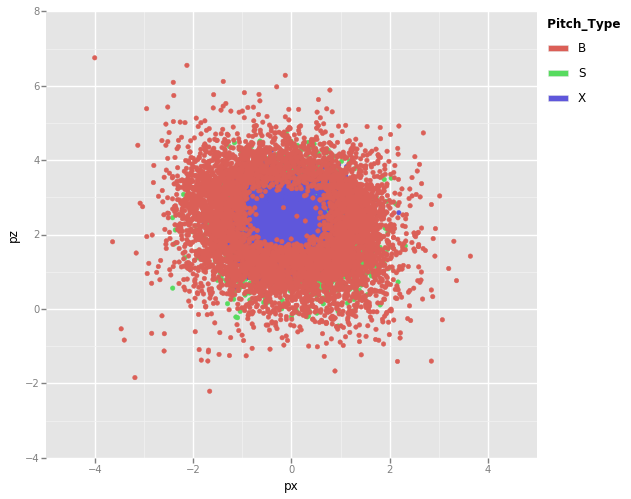

<ggplot: (34354461)>

In [5]:
ggplot(aes(x='px', y='pz', color='pitch_type'), data=df) +\
    geom_jitter()

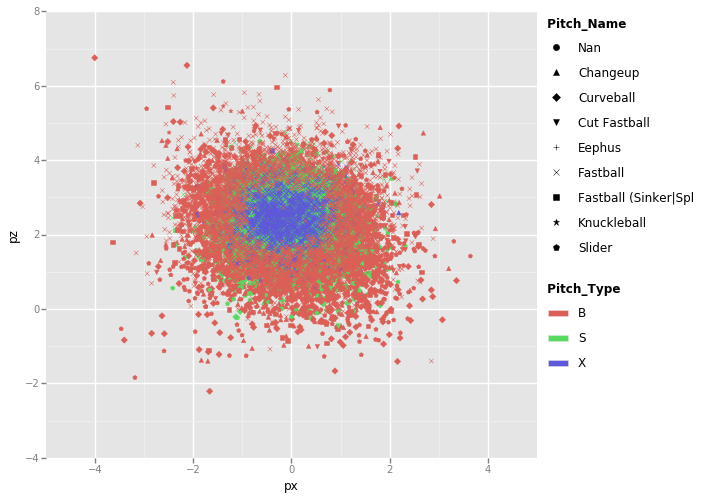

<ggplot: (34670480)>

In [14]:
ggplot(aes(x='px', y='pz', color='pitch_type', shape='pitch_name'), data=df) +\
    geom_jitter()

# Let's limit to 1 hitter¶


In [16]:
df.hitter_name.value_counts().head(10)

Eric Young        101
Jose Reyes         91
Tommy Medica       90
Daniel Murphy      90
Mitch Moreland     89
Shin-Soo Choo      89
Ben Zobrist        87
Lucas Duda         85
Carlos Santana     83
Craig Gentry       83
Name: hitter_name, dtype: int64

In [17]:
hitter = df[df.hitter_name=='Mike Trout']
hitter.head()

,pitch_time,inning,pitcher_name,hitter_name,pitch_type,sz_top,sz_bottom,px,pz,pitch_name,start_speed,end_speed,type_confidence
3415,2013-09-29 15:11:23 -0400,1,Yu Darvish,Mike Trout,B,3.48,1.57,1.120,1.995,Fastball,92.1,85.9,0.911
3416,2013-09-29 15:11:39 -0400,1,Yu Darvish,Mike Trout,X,3.48,1.59,0.156,2.002,Fastball,92.3,87.4,0.908
3487,2013-09-29 15:54:36 -0400,4,Yu Darvish,Mike Trout,S,3.57,1.61,0.204,1.687,Fastball,91.4,85.1,0.909
3488,2013-09-29 15:54:56 -0400,4,Yu Darvish,Mike Trout,B,3.57,1.74,-2.115,2.987,Fastball,89.7,84.4,0.872
3489,2013-09-29 15:55:21 -0400,4,Yu Darvish,Mike Trout,S,3.64,1.81,0.033,2.472,Fastball (sinker|split-fingered),84.5,80.6,0.936


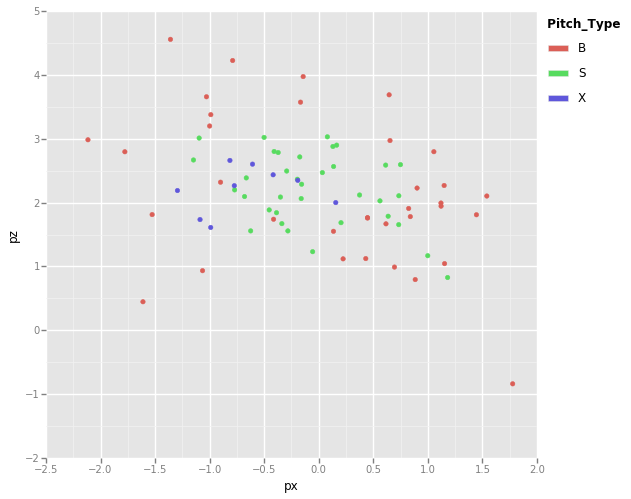

<ggplot: (34670589)>

In [18]:
ggplot(aes(x='px', y='pz', color='pitch_type'), data=hitter) +\
    geom_point()

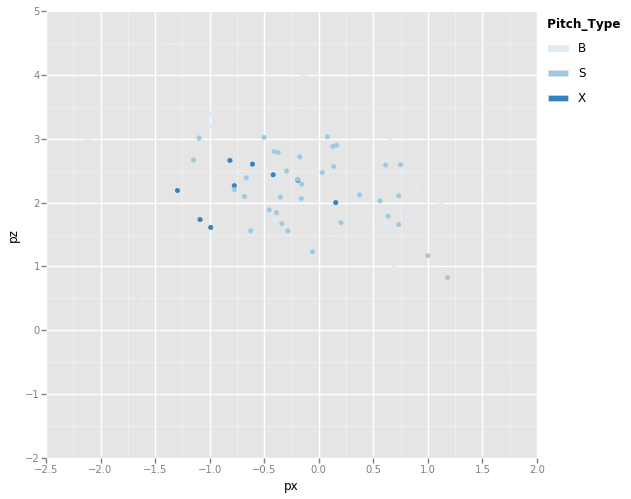

<ggplot: (37676281)>

In [19]:
ggplot(aes(x='px', y='pz', color='pitch_type'), data=hitter) +\
    geom_point() + scale_color_brewer()

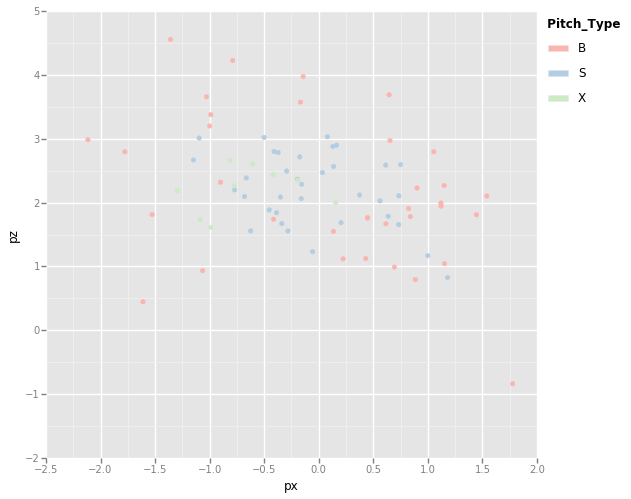

<ggplot: (37847973)>

In [21]:
ggplot(aes(x='px', y='pz', color='pitch_type'), data=hitter) +\
    geom_point() + scale_color_brewer(type='qual', palette=4)

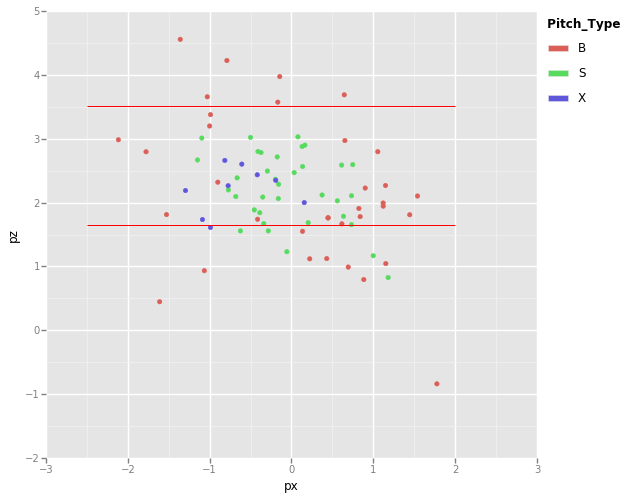

<ggplot: (37851350)>

In [22]:
ggplot(aes(x='px', y='pz', color='pitch_type'), data=hitter) +\
    geom_point() +\
    geom_hline(yintercept=[hitter.sz_bottom.mean(),hitter.sz_top.mean()], color='red')

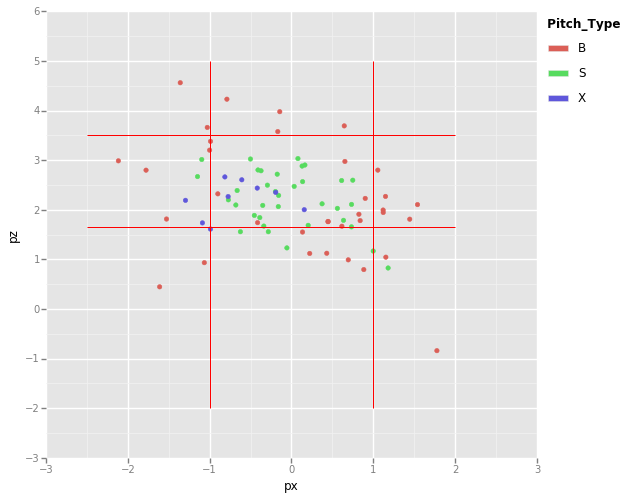

<ggplot: (37674900)>

In [23]:
ggplot(aes(x='px', y='pz', color='pitch_type'), data=hitter) +\
    geom_point() +\
    geom_hline(yintercept=[hitter.sz_bottom.mean(), hitter.sz_top.mean()], color='red') +\
    geom_vline(xintercept=[-1, 1], color='red')

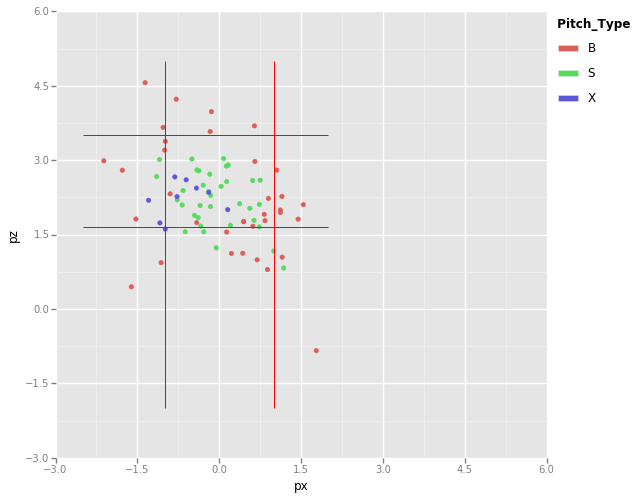

<ggplot: (36459215)>

In [24]:

ggplot(aes(x='px', y='pz', color='pitch_type'), data=hitter) +\
    geom_point() +\
    geom_hline(yintercept=[hitter.sz_bottom.mean(), hitter.sz_top.mean()], color='red') +\
    geom_vline(xintercept=[-1, 1], color='red') +\
    coord_equal()

# How do pitches change speed?¶

In [36]:
fastballs = df[df.pitch_name=='Fastball']
fastballs['diffspeed']=fastballs['start_speed']-fastballs['end_speed']

C:\Users\seeth_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


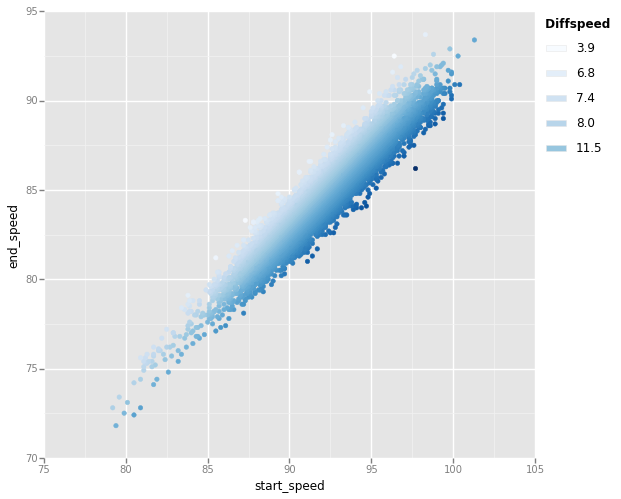

<ggplot: (33954880)>

In [39]:
ggplot(aes(x='start_speed', y='end_speed',color='diffspeed'), data=fastballs.head(10000)) + geom_point() + scale_color_gradient()

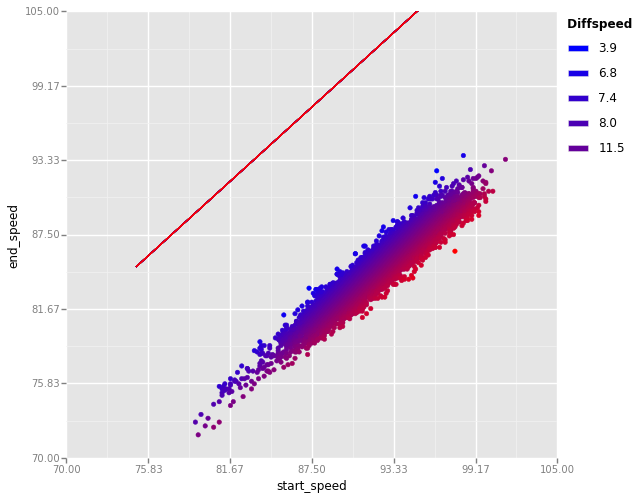

<ggplot: (33987837)>

In [40]:
ggplot(aes(x='start_speed', y='end_speed', color='diffspeed'), data=fastballs.head(10000)) +\
    geom_point() +\
    scale_color_gradient(low="blue", high="red") +\
    geom_abline(intercept=10) +\
    coord_equal()

# Pitch speed as a function of location¶

How does C.J. Wilson use his pitches?


In [42]:
pitcher = df[df.pitcher_name=="C.J. Wilson"]

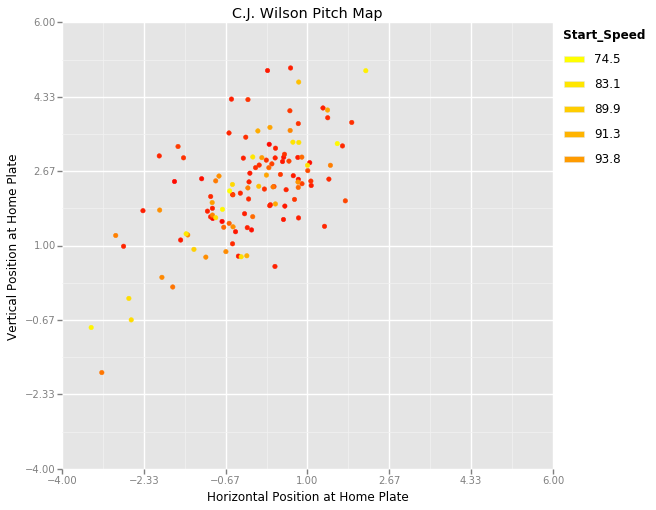

<ggplot: (37680981)>

In [43]:
ggplot(aes(x='px', y='pz', color='start_speed'), data=pitcher) +\
    geom_point() +\
    scale_color_gradient(low='yellow', high='red') +\
    coord_equal() + \
    xlab("Horizontal Position at Home Plate") +\
    ylab("Vertical Position at Home Plate") +\
    ggtitle("C.J. Wilson Pitch Map")

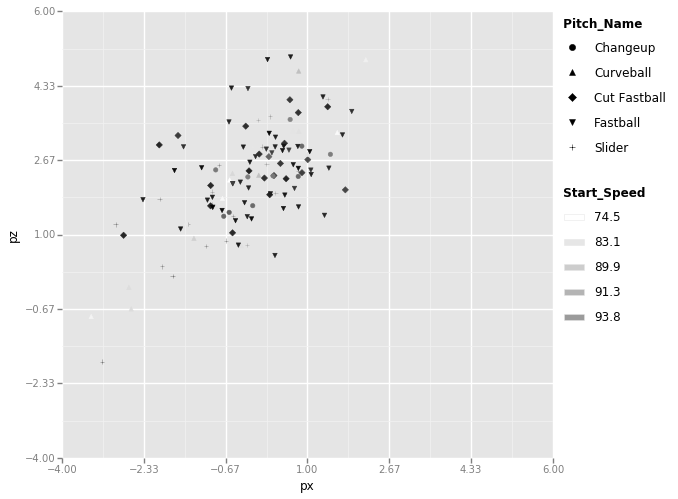

<ggplot: (37789465)>

In [44]:
ggplot(aes(x='px', y='pz', color='start_speed', shape='pitch_name'), data=pitcher) +\
    geom_point() +\
    scale_color_gradient(low='white', high='black') +\
    coord_equal()

In [45]:
def normalize_pitch(speed):
    return (speed - speed.min()) / (speed.max() - speed.min())
    
pitcher['pitch_speed_norm'] = pitcher.groupby(["pitcher_name", "pitch_name"]).start_speed.apply(normalize_pitch)

C:\Users\seeth_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


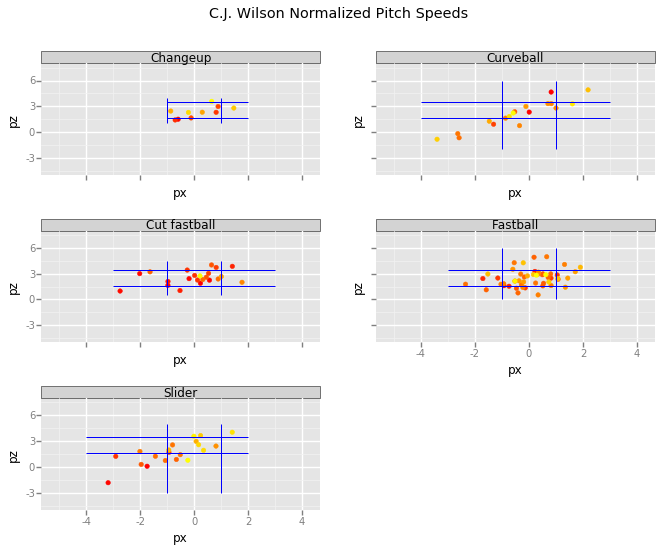

<ggplot: (37879107)>

In [46]:
ggplot(aes(x='px', y='pz', color='pitch_speed_norm'), data=pitcher) +\
    geom_point() +\
    geom_hline(yintercept=[pitcher.sz_bottom.mean(), pitcher.sz_top.mean()], color='blue') +\
    geom_vline(xintercept=[-1, 1], color='blue') +\
    scale_color_gradient(low='yellow', high='red') +\
    facet_wrap("pitch_name", scales="fixed") +\
    ggtitle("C.J. Wilson Normalized Pitch Speeds")

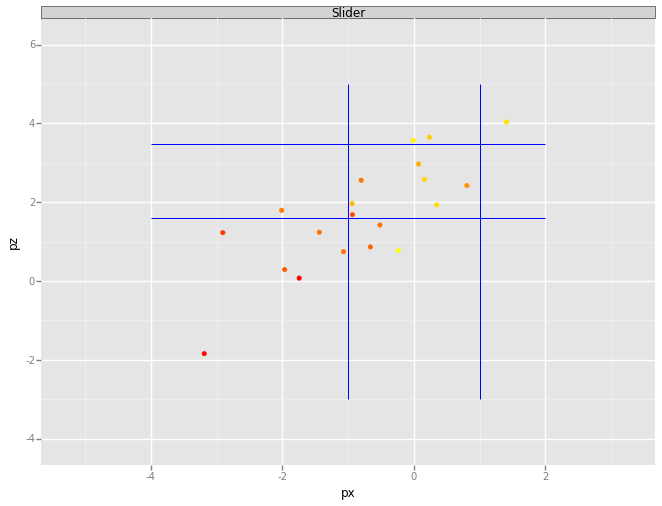

<ggplot: (16641621)>

In [47]:
ggplot(aes(x='px', y='pz', color='pitch_speed_norm'), data=pitcher[pitcher.pitch_name=="Slider"]) +\
    geom_point() +\
    geom_hline(yintercept=[pitcher.sz_bottom.mean(), pitcher.sz_top.mean()], color='blue') +\
    geom_vline(xintercept=[-1, 1], color='blue') +\
    scale_color_gradient(low='yellow', high='red') +\
    facet_wrap("pitch_name", scales="fixed")

# Themes
ggplot ships with a few themes that are easy to customize. My favorite is seaborn.


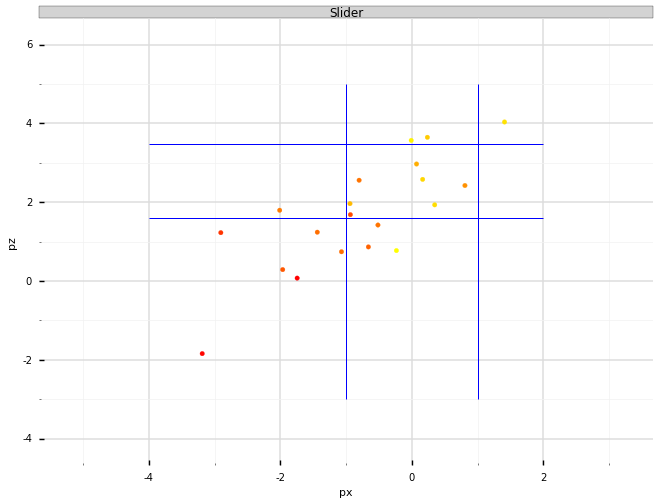

<ggplot: (38460241)>

In [48]:
ggplot(aes(x='px', y='pz', color='pitch_speed_norm'), data=pitcher[pitcher.pitch_name=="Slider"]) +\
    geom_point() +\
    geom_hline(yintercept=[pitcher.sz_bottom.mean(), pitcher.sz_top.mean()], color='blue') +\
    geom_vline(xintercept=[-1, 1], color='blue') +\
    scale_color_gradient(low='yellow', high='red') +\
    facet_wrap("pitch_name", scales="fixed") +\
    theme_seaborn()

In [49]:
#not working
#ggplot(aes(x='px', y='pz', color='pitch_speed_norm'), data=pitcher[pitcher.pitch_name=="Slider"]) +\
 #   geom_point() +\
  #  geom_hline(yintercept=[pitcher.sz_bottom.mean(), pitcher.sz_top.mean()], color='blue') +\
   # geom_vline(xintercept=[-1, 1], color='blue') +\
    #scale_color_gradient(low='yellow', high='red') +\
    #facet_wrap("pitch_name", scales="fixed") +\
    #theme_xkcd()

In [50]:
#ggplot(aes(x='inning', y='start_speed'), data=df) + stat_smooth(color='steelblue') + theme_xkcd()
# NOT WORKING